# Notebook for the Evolution of trackers.

In [1]:
# compute the mean change of different trackers. 
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
df_control = pd.read_csv("../dataset_archive/frame_control_count_who.csv",sep = '\t')
df_edu = pd.read_csv("../dataset_archive/frame_edu_count_who.csv",sep = '\t')

SMALL_SIZE = 12
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [2]:
df_control_des = df_control.describe()
df_edu_des = df_edu.describe()
df_edu_des

,tracker_2012,tracker_2013,tracker_2014,tracker_2015,tracker_2016,tracker_2017,tracker_2018,tracker_2019,tracker_2020,tracker_2021
count,17975.00000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000
mean,1.23121,1.461530,1.607955,1.819249,2.075494,2.235994,2.393324,2.442503,2.442615,2.394715
std,1.38979,1.561134,1.641583,1.746187,1.892554,1.982073,2.052840,2.070558,2.073890,2.059595
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.00000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.00000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000
max,12.00000,12.000000,13.000000,13.000000,14.000000,16.000000,15.000000,14.000000,15.000000,18.000000


In [3]:
df_control_des

,tracker_2012,tracker_2013,tracker_2014,tracker_2015,tracker_2016,tracker_2017,tracker_2018,tracker_2019,tracker_2020,tracker_2021
count,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000
mean,1.650904,1.832990,1.968456,2.105647,2.269374,2.328901,2.338748,2.292017,2.264979,2.167789
std,2.028209,2.151007,2.215058,2.229944,2.285772,2.295049,2.267500,2.227045,2.167347,2.121438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000
max,16.000000,16.000000,17.000000,18.000000,19.000000,21.000000,27.000000,19.000000,16.000000,18.000000


In [4]:
df_edu_des['10_years_increased'] = (df_edu_des['tracker_2021'] - df_edu_des['tracker_2012']) / df_edu_des['tracker_2012']
df_edu_des

,tracker_2012,tracker_2013,tracker_2014,tracker_2015,tracker_2016,tracker_2017,tracker_2018,tracker_2019,tracker_2020,tracker_2021,10_years_increased
count,17975.00000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,0.000000
mean,1.23121,1.461530,1.607955,1.819249,2.075494,2.235994,2.393324,2.442503,2.442615,2.394715,0.945009
std,1.38979,1.561134,1.641583,1.746187,1.892554,1.982073,2.052840,2.070558,2.073890,2.059595,0.481947
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,inf
50%,1.00000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.00000,2.000000,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,12.00000,12.000000,13.000000,13.000000,14.000000,16.000000,15.000000,14.000000,15.000000,18.000000,0.500000


In [5]:
df_control_des['10_years_increased'] = (df_control_des['tracker_2021'] - df_control_des['tracker_2012']) / df_control_des['tracker_2012']
df_control_des

,tracker_2012,tracker_2013,tracker_2014,tracker_2015,tracker_2016,tracker_2017,tracker_2018,tracker_2019,tracker_2020,tracker_2021,10_years_increased
count,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,17975.000000,0.000000
mean,1.650904,1.832990,1.968456,2.105647,2.269374,2.328901,2.338748,2.292017,2.264979,2.167789,0.313092
std,2.028209,2.151007,2.215058,2.229944,2.285772,2.295049,2.267500,2.227045,2.167347,2.121438,0.045966
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN
50%,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
75%,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,0.500000
max,16.000000,16.000000,17.000000,18.000000,19.000000,21.000000,27.000000,19.000000,16.000000,18.000000,0.125000


# 2018 decrease

In [6]:
# df_edu_des['18_decreased'] = (df_edu_des['tracker_2021'] - df_edu_des['tracker_2018']) / df_edu_des['tracker_2018']
# df_edu_des

In [7]:
# df_control_des['18_decreased'] = (df_control_des['tracker_2021'] - df_control_des['tracker_2018']) / df_control_des['tracker_2018']
# df_control_des

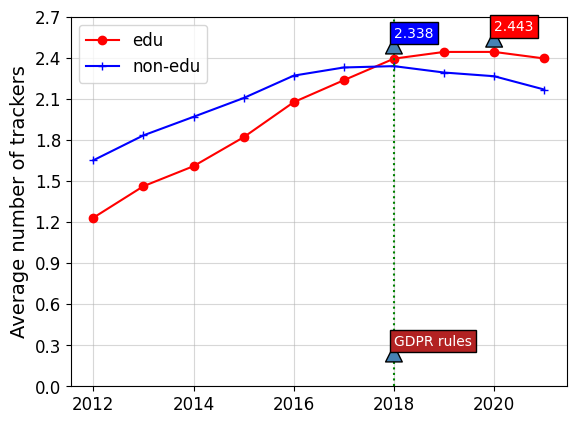

In [8]:
# avg number change

   
Year = list(range(2012,2022))

  
plt.plot(Year, df_edu_des.loc['mean'], color='red', marker='o',label = 'edu')
plt.plot(Year, df_control_des.loc['mean'], color='blue', marker='+',label = "non-edu")

# plt.title('Average number of trackers', fontsize=14)
# plt.xlabel('Year', fontsize=14)
plt.ylabel('Average number of trackers', fontsize=14)
plt.axvline(x = 2018, color = 'green', linestyle = ':')
plt.yticks(np.arange(0, 2.8, step=0.3))
plt.legend()
plt.annotate('2.338', xy=(2018, 2.55),
             bbox=dict( boxstyle='square',  fc='blue'),
             arrowprops=dict(facecolor='steelblue', shrink=0.01), fontsize=10, color='white')
plt.annotate('2.443', xy=(2020, 2.6),
             bbox=dict(boxstyle='square', fc='red'),
             arrowprops=dict(facecolor='steelblue', shrink=0.01), fontsize=10, color='white')

plt.annotate('GDPR rules', xy=(2018, 0.3),
             bbox=dict(boxstyle='square', fc='firebrick'),
             arrowprops=dict(facecolor='steelblue', shrink=0.01), fontsize=10, color='white')
plt.grid(alpha = 0.5)
plt.savefig("../images/section4/avg_number.png",dpi = 200)
plt.show()


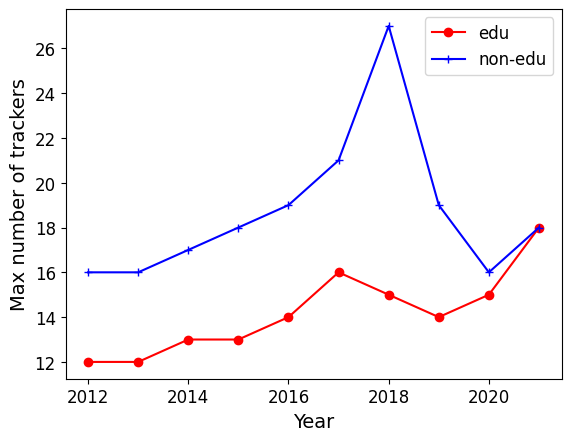

In [9]:
# max

plt.plot(Year, df_edu_des.loc['max'], color='red', marker='o',label = 'edu')
plt.plot(Year, df_control_des.loc['max'], color='blue', marker='+',label = "non-edu")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Max number of trackers', fontsize=14)
plt.legend()
plt.savefig("../images/section4/max_number.png",dpi = 200)

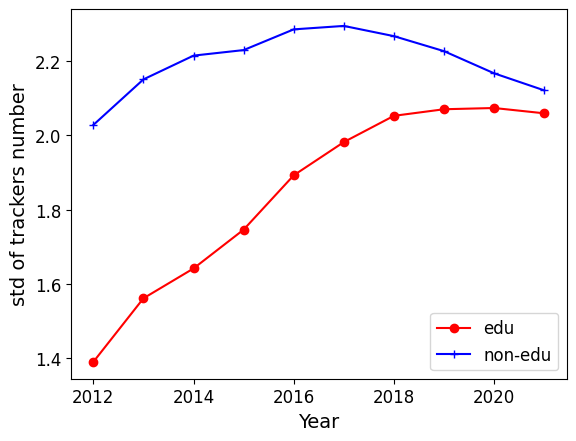

In [10]:
# std 
plt.plot(Year, df_edu_des.loc['std'], color='red', marker='o',label = 'edu')
plt.plot(Year, df_control_des.loc['std'], color='blue', marker='+',label = "non-edu")
plt.xlabel('Year', fontsize=14)
plt.ylabel('std of trackers number', fontsize=14)
plt.legend()
plt.savefig("../images/section4/max_number.png",dpi = 200)

## Analyze the develop of tracker rate

In [11]:
df_rate_edu = pd.read_csv("../dataset_archive/df_rate_merge_edu_whoexclude.csv").fillna(0)
df_rate_control = pd.read_csv("../dataset_archive/df_rate_merge_base_whoexclude.csv").fillna(0)

df_rate_edu.head()

df_rate_edu.loc[df_rate_edu.trackers == 'cloudflare']
df_rate_control.loc[df_rate_control.trackers == "cloudflare"]

,trackers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
71,cloudflare,0.001613,0.002837,0.007065,0.012573,0.021641,0.029652,0.040167,0.049124,0.056634,0.05886


In [12]:
tracker_list = []
for year in range(2012, 2022):
    list_e = df_rate_edu.sort_values(by = str(year),ascending = False).head(10)['trackers'].to_list()
    print(list_e)
    tracker_list.extend(df_rate_edu.sort_values(by = str(year),ascending = False).head(10)['trackers'].to_list())

set(tracker_list)

['google-analytics', 'google', 'googleapis', 'facebook', 'addthis', 'adobe', 'youtube', 'twimg', 'googlesyndication', 'twitter']
['google-analytics', 'googleapis', 'google', 'facebook', 'youtube', 'addthis', 'cloudfront', 'twimg', 'twitter', 'adobe']
['google-analytics', 'googleapis', 'google', 'facebook', 'youtube', 'doubleclick', 'addthis', 'googleadservices', 'twitter', 'newrelic']
['google-analytics', 'googleapis', 'google', 'facebook', 'youtube', 'doubleclick', 'addthis', 'googleadservices', 'jquery', 'typekit']
['google-analytics', 'googleapis', 'google', 'youtube', 'facebook', 'doubleclick', 'newrelic', 'addthis', 'typekit', 'jquery']
['google-analytics', 'googleapis', 'google', 'youtube', 'facebook', 'cloudflare', 'typekit', 'newrelic', 'doubleclick', 'jquery']
['google-analytics', 'googleapis', 'google', 'facebook', 'youtube', 'cloudflare', 'newrelic', 'twitter', 'typekit', 'jquery']
['google-analytics', 'googleapis', 'google', 'facebook', 'youtube', 'cloudflare', 'twitter', '

{'addthis',
 'adobe',
 'cloudflare',
 'cloudfront',
 'doubleclick',
 'facebook',
 'google',
 'google-analytics',
 'googleadservices',
 'googleapis',
 'googlesyndication',
 'jquery',
 'newrelic',
 'twimg',
 'twitter',
 'typekit',
 'youtube'}

In [13]:
# get the top 10 for each year


In [14]:
# draw figure
years = list(range(2012,2022))
years

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

# Heat map of the tracker number evoluation 

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


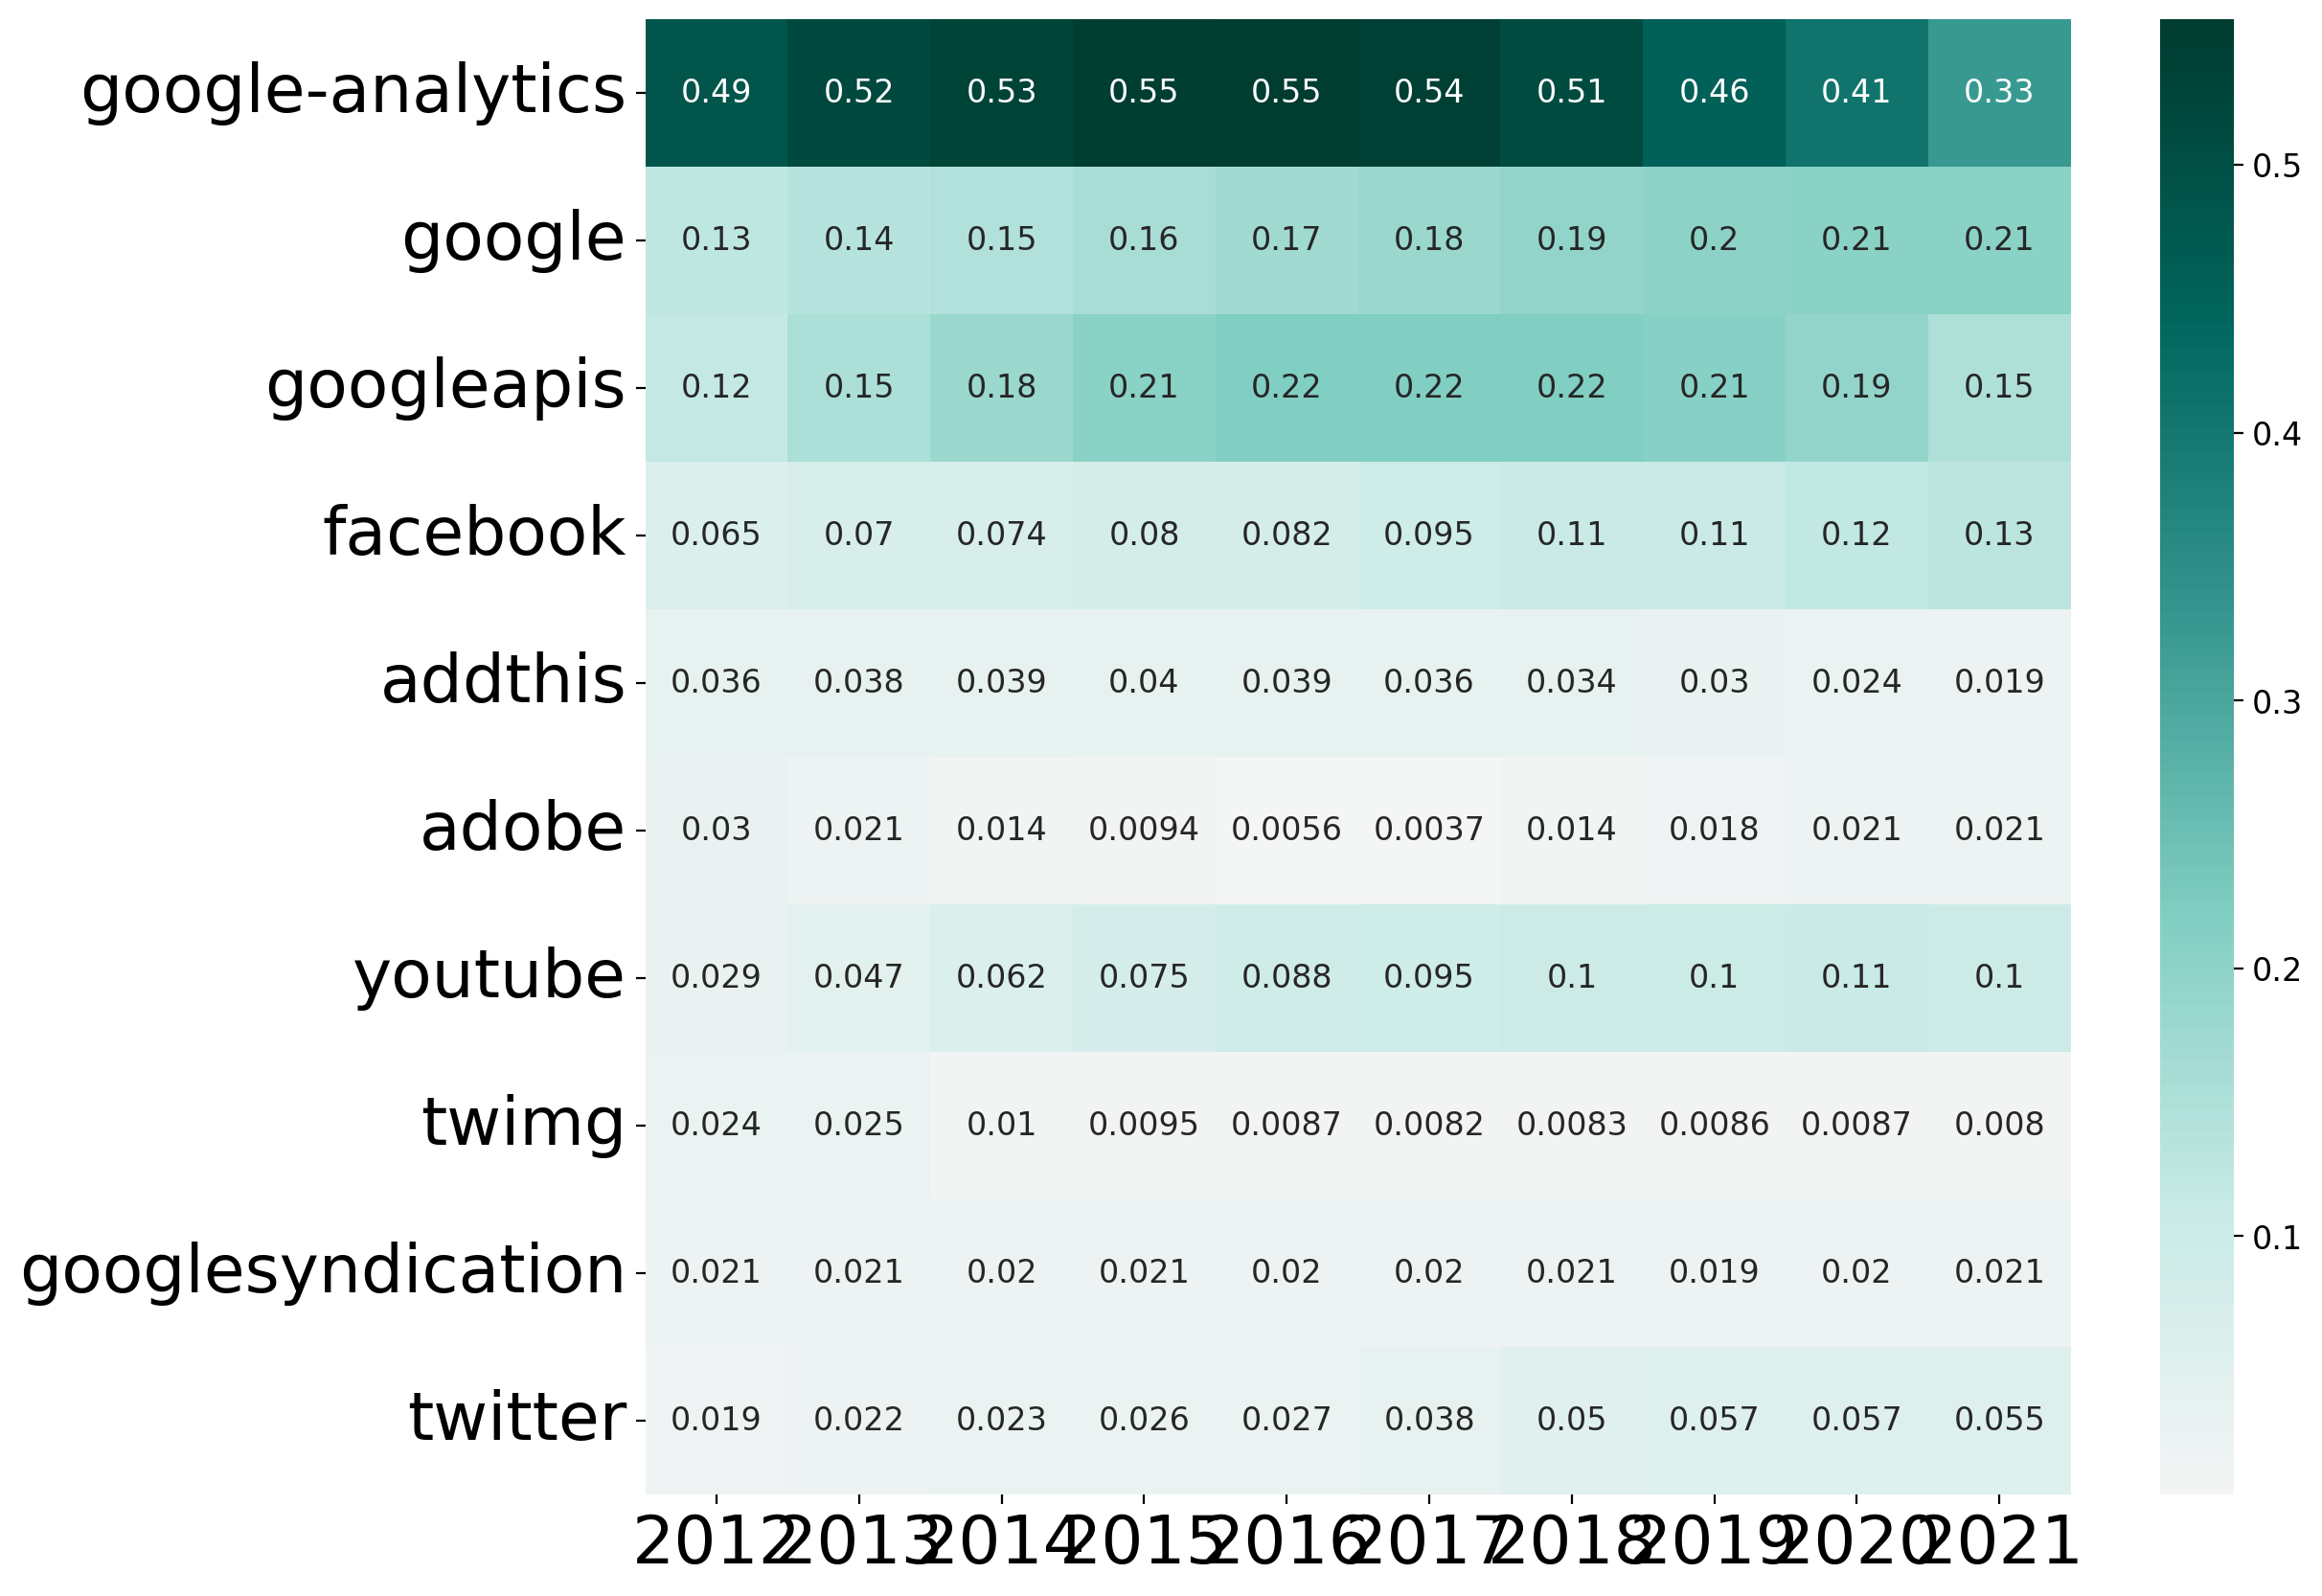

In [15]:
import seaborn as sns

tracker_names_list = list(map(str,list(range(2012,2022))))
print(tracker_names_list)
df_rate_edu_draw = df_rate_edu[:10]
plt.figure(figsize=(12,10), dpi= 200)
sns.heatmap(df_rate_edu_draw[tracker_names_list], xticklabels=range(2012,2022), yticklabels=df_rate_edu_draw.trackers, cmap='BrBG', center=0, annot=True)

# Decorations
# plt.title('Different Categorical Evolution', fontsize=22)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

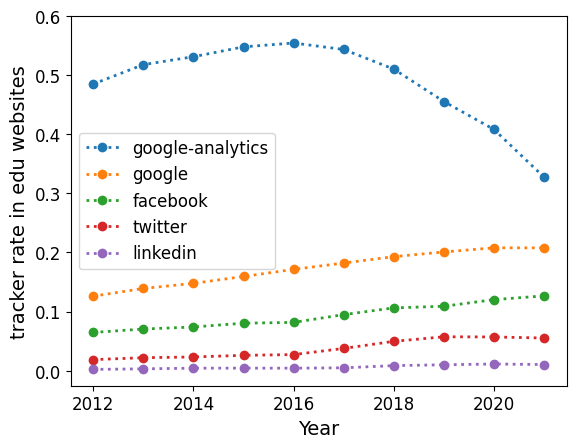

In [16]:
for trackers in ['google-analytics','google','facebook','twitter','linkedin']:
    rate_edu_l = df_rate_edu.loc[df_rate_edu.trackers == trackers].values.flatten().tolist()
    plt.plot(years,rate_edu_l[1:11],marker='o',label = trackers, linestyle=':',linewidth = 2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('tracker rate in edu websites', fontsize=14)
plt.yticks(np.arange(0, 0.7, step=0.1))
plt.legend()
plt.savefig("../images/section4/tracker_rate_change_edu.png",dpi = 200)

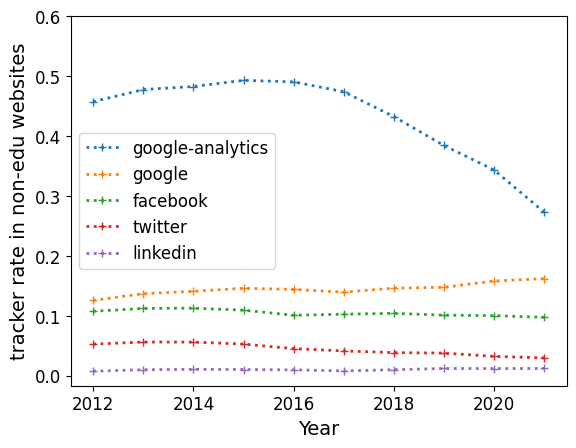

In [17]:
for trackers in ['google-analytics','google','facebook','twitter','linkedin']:
    rate_control_l = df_rate_control.loc[df_rate_control.trackers == trackers].values.flatten().tolist()
    plt.plot(years,rate_control_l[1:11],marker='+',label = trackers,linestyle=':',linewidth = 2)
plt.xlabel('Year', fontsize=14)
plt.ylabel('tracker rate in non-edu websites', fontsize=14)
plt.yticks(np.arange(0, 0.7, step=0.1))
plt.savefig("../images/section4/tracker_rate_change_non-edu.png",dpi = 200)
plt.legend()

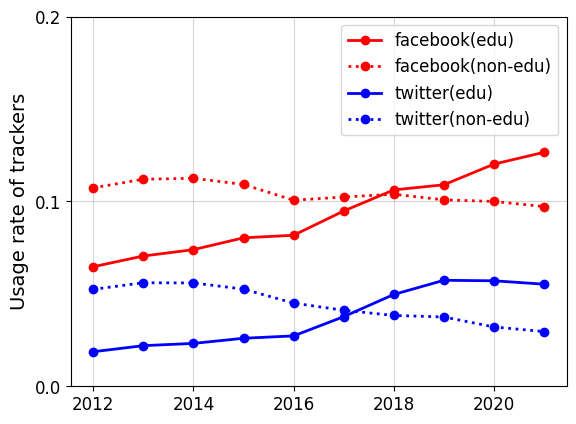

In [18]:

color_map = {"facebook":"red","twitter":"blue","linkedin":"green","google":"orange","google-analytics":"green"}

for trackers in ['facebook','twitter']:
    rate_edu_l = df_rate_edu.loc[df_rate_edu.trackers == trackers].values.flatten().tolist()
    rate_control_l = df_rate_control.loc[df_rate_control.trackers == trackers].values.flatten().tolist()
    plt.plot(years,rate_edu_l[1:11],marker='o',label = f'{trackers}(edu)',linewidth = 2,color =color_map[trackers] )
    plt.plot(years,rate_control_l[1:],marker='o',label = f'{trackers}(non-edu)',linestyle=':',linewidth = 2,color =color_map[trackers])
# plt.xlabel('Year', fontsize=14) 
plt.ylabel('Usage rate of trackers', fontsize=14)
plt.yticks(np.arange(0, 0.3, step=0.1))
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("../images/section4/usage_rate_trackers_comparision.png",dpi = 600)

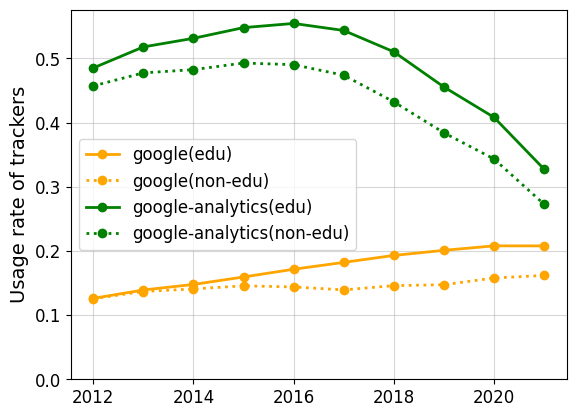

In [19]:
# color_map['twimg'] = "red"
for trackers in ['google','google-analytics']:
    rate_edu_l = df_rate_edu.loc[df_rate_edu.trackers == trackers].values.flatten().tolist()
    rate_control_l = df_rate_control.loc[df_rate_control.trackers == trackers].values.flatten().tolist()
    plt.plot(years,rate_edu_l[1:],marker='o',label = f'{trackers}(edu)',linewidth = 2,color =color_map[trackers] )
    plt.plot(years,rate_control_l[1:],marker='o',label = f'{trackers}(non-edu)',linestyle=':',linewidth = 2,color =color_map[trackers])
# plt.xlabel('Year', fontsize=14) 
plt.ylabel('Usage rate of trackers', fontsize=14)
plt.yticks(np.arange(0, 0.6, step=0.1))
plt.legend()
plt.grid(alpha=0.5)
plt.savefig("../images/section4/usage_rate_trackers_comparision_2.png",dpi = 600)

In [20]:
df_rate_edu[:10]

,trackers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,google-analytics,0.485063,0.517886,0.531293,0.547983,0.554492,0.543533,0.510320,0.455466,0.408178,0.327399
1,google,0.126064,0.139138,0.147761,0.159388,0.171460,0.182142,0.192990,0.200946,0.207900,0.207844
2,googleapis,0.116384,0.152601,0.181752,0.206342,0.219583,0.220695,0.218470,0.208623,0.193769,0.150932
3,facebook,0.064701,0.070487,0.073936,0.080334,0.081725,0.094854,0.106259,0.109040,0.120223,0.126620
4,addthis,0.035549,0.037997,0.039277,0.040278,0.038720,0.035549,0.033602,0.029819,0.023588,0.018860
5,adobe,0.030097,0.021363,0.013964,0.009402,0.005619,0.003727,0.013964,0.017691,0.020584,0.020584
6,youtube,0.028818,0.047010,0.062197,0.074771,0.088067,0.095299,0.100417,0.100584,0.106481,0.100306
7,twimg,0.023700,0.024701,0.010292,0.009458,0.008734,0.008178,0.008345,0.008623,0.008679,0.007955
8,googlesyndication,0.020751,0.020918,0.020362,0.020529,0.020250,0.020417,0.020695,0.019471,0.020083,0.020529
9,twitter,0.018693,0.021975,0.023199,0.025981,0.027260,0.037663,0.049680,0.057357,0.057079,0.055243


In [21]:
df_rate_control[:10]

,trackers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,google-analytics,0.457135,0.477441,0.482503,0.492796,0.490236,0.473825,0.432323,0.384089,0.343310,0.272823
1,google,0.125508,0.136745,0.140751,0.145647,0.143866,0.139305,0.145925,0.147371,0.157830,0.161836
2,googleapis,0.114437,0.141530,0.160612,0.173074,0.178470,0.176245,0.174854,0.166843,0.156217,0.136857
3,facebook,0.107371,0.112045,0.112545,0.109207,0.100695,0.102420,0.103922,0.100862,0.100028,0.097246
4,googlesyndication,0.065090,0.061307,0.057024,0.054854,0.055299,0.053964,0.052740,0.051850,0.052184,0.048679
5,twitter,0.052462,0.056022,0.055911,0.052573,0.045007,0.041113,0.038331,0.037497,0.032100,0.029597
6,youtube,0.042003,0.053129,0.064312,0.072323,0.076996,0.079166,0.079944,0.074882,0.076273,0.073769
7,addthis,0.035327,0.036829,0.037218,0.038275,0.036106,0.033880,0.031989,0.027705,0.023421,0.019750
8,quantserve,0.033825,0.033936,0.024256,0.020139,0.019527,0.017858,0.011071,0.006732,0.005786,0.005396
9,wordpress,0.031377,0.036495,0.040056,0.016078,0.013129,0.012350,0.011127,0.010459,0.009235,0.008401


# plot the increase rate in the last 10 years

In [22]:

# df_rate_edu['10_year_change'] = (df_rate_edu['2021'] - df_rate_edu['2012']) / df_rate_edu['2012']
# df_rate_control['10_year_change'] = (df_rate_control['2021'] - df_rate_control['2012']) / df_rate_control['2012']

# # creat a dictionary
# edu_k_v = dict(zip(df_rate_edu['trackers'].to_list(),df_rate_edu['10_year_change'].to_list()))
# control_k_v = dict(zip(df_rate_control['trackers'].to_list(), df_rate_control['10_year_change'].to_list()))

# fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)


# x = df_rate_edu['trackers'][:10].to_list()
# y_edu = [edu_k_v[key] for key in x]
# y_control = [control_k_v[key]for key in x]

# bar_width = 0.35
# # ax.rc("font", size="25")

# rects1 = ax.barh(x, y_edu, label="educational websites", color="red")
# rects2 = ax.barh(x, y_control , label="non-educationl websites", color="blue", left = y_edu)
# plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)


# # plt.xticks(rotation=45)
# ax.legend(fontsize = 20)
# # plt.savefig(
# #     "images/{}_rate_{}{}.png".format(draw_type, tracker_type, element_type),bbox_inches='tight', dpi=200
# # )

# ax.grid(alpha=0.5)
# plt.savefig("../images/section4/usage_rate_trackers_top_10.png",dpi = 600)
# plt.show()


In [23]:
df_rate_edu['10_year_change'] = (df_rate_edu['2021'] - df_rate_edu['2012']) / df_rate_edu['2012']
df_rate_control['10_year_change'] = (df_rate_control['2021'] - df_rate_control['2012']) / df_rate_control['2012']
df_rate_edu[['trackers','2012','2021','10_year_change']].head(30)

,trackers,2012,2021,10_year_change
0,google-analytics,0.485063,0.327399,-0.325037
1,google,0.126064,0.207844,0.648720
2,googleapis,0.116384,0.150932,0.296845
3,facebook,0.064701,0.126620,0.957008
4,addthis,0.035549,0.018860,-0.469484
5,adobe,0.030097,0.020584,-0.316081
6,youtube,0.028818,0.100306,2.480695
7,twimg,0.023700,0.007955,-0.664319
8,googlesyndication,0.020751,0.020529,-0.010724
9,twitter,0.018693,0.055243,1.955357


In [24]:
# creat a dictionary
edu_k_v = dict(zip(df_rate_edu['trackers'].to_list(),df_rate_edu['10_year_change'].to_list()))
control_k_v = dict(zip(df_rate_control['trackers'].to_list(), df_rate_control['10_year_change'].to_list()))
labels = df_rate_edu['trackers'][:10].to_list()
# labels = list(set(tracker_list))

y_edu = {key: edu_k_v[key] for key in labels}
y_control = {key: control_k_v[key]for key in labels}
y_edu = dict(sorted(y_edu.items(), key=lambda item: item[1],reverse=False))
y_edu


{'twimg': -0.6643192488262932,
 'addthis': -0.46948356807511943,
 'google-analytics': -0.32503727491684825,
 'adobe': -0.3160813308687627,
 'googlesyndication': -0.010723860589815056,
 'googleapis': 0.2968451242829829,
 'google': 0.6487202118270089,
 'facebook': 0.9570077386070506,
 'twitter': 1.9553571428571475,
 'youtube': 2.4806949806949863}

In [25]:
y_control

{'google-analytics': -0.4031885116222465,
 'google': 0.2894503546099287,
 'googleapis': 0.19591638308215864,
 'facebook': -0.09430051813471486,
 'addthis': -0.4409448818897641,
 'adobe': -0.11529933481153139,
 'youtube': 0.7562913907284784,
 'twimg': -0.7837301587301603,
 'googlesyndication': -0.25213675213675335,
 'twitter': -0.4358430540827155}

In [26]:
labels = y_edu.keys()
y_edu_draw = y_edu.values()
y_control_draw = [control_k_v[key] for key in labels]
print(labels)

dict_keys(['twimg', 'addthis', 'google-analytics', 'adobe', 'googlesyndication', 'googleapis', 'google', 'facebook', 'twitter', 'youtube'])


In [27]:
print(y_edu_draw)

dict_values([-0.6643192488262932, -0.46948356807511943, -0.32503727491684825, -0.3160813308687627, -0.010723860589815056, 0.2968451242829829, 0.6487202118270089, 0.9570077386070506, 1.9553571428571475, 2.4806949806949863])


In [28]:
print(y_control_draw)

[-0.7837301587301603, -0.4409448818897641, -0.4031885116222465, -0.11529933481153139, -0.25213675213675335, 0.19591638308215864, 0.2894503546099287, -0.09430051813471486, -0.4358430540827155, 0.7562913907284784]


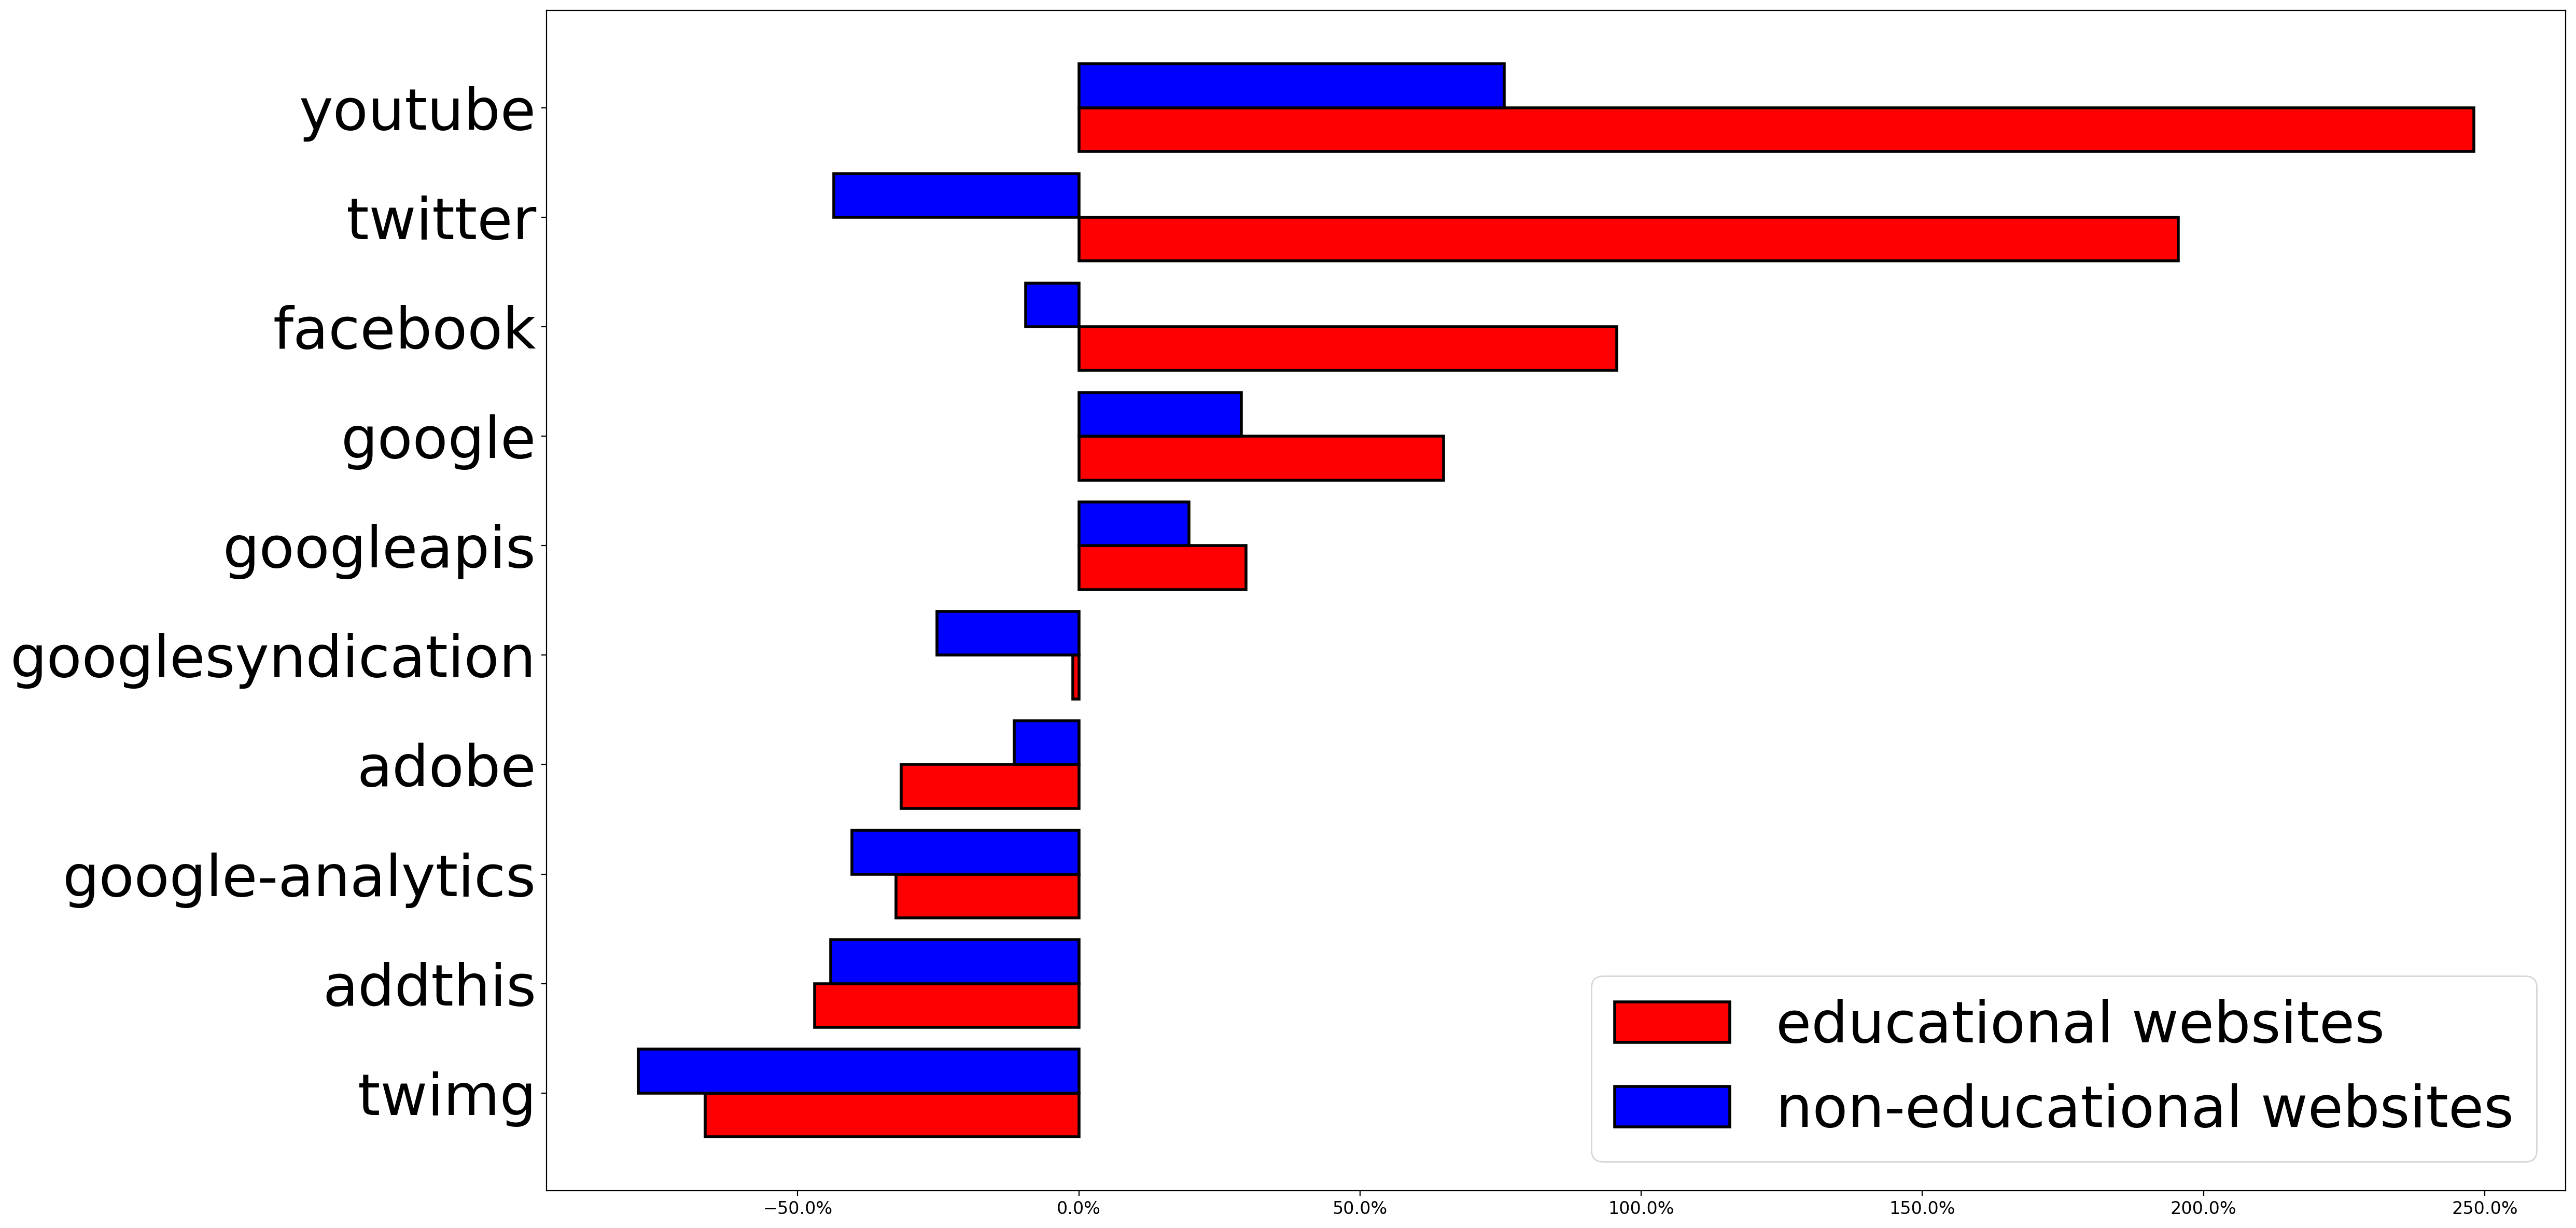

In [29]:

from matplotlib import ticker

import numpy as np 



# y_edu_labels = [f"{100*round(edu_k_v[key],2)}%" for key in labels]
# y_control_labels = [f"{100*round(control_k_v[key],2)}%" for key in labels]
# y_control_labels[1] = '29.0%'


x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=(25,12), facecolor='white', dpi= 200)
rects1 = ax.barh(x - width/2, y_edu_draw, width,label='educational websites', color = "red",linewidth = 2,edgecolor='black')
rects2 = ax.barh(x + width/2, y_control_draw, width, label='non-educational websites', color = "blue", linewidth = 2,edgecolor='black')



plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))


# Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_title('Scores by group and gender')
ax.set_yticks(x, labels,fontsize = 40)


ax.legend(fontsize = 40)
# ax.bar_label(rects1, padding=0, labels = y_edu_labels,fmt='%.2f',fontsize = 20)
# ax.bar_label(rects2, padding=0, labels = y_control_labels,fmt='%.2f',fontsize = 20)
plt.rc('xtick', labelsize=40) 
fig.tight_layout()
   # fontsize of the tick labels

plt.show()

In [30]:
df_rate_edu[['trackers','10_year_change',"2012","2021"]][:10]


,trackers,10_year_change,2012,2021
0,google-analytics,-0.325037,0.485063,0.327399
1,google,0.648720,0.126064,0.207844
2,googleapis,0.296845,0.116384,0.150932
3,facebook,0.957008,0.064701,0.126620
4,addthis,-0.469484,0.035549,0.018860
5,adobe,-0.316081,0.030097,0.020584
6,youtube,2.480695,0.028818,0.100306
7,twimg,-0.664319,0.023700,0.007955
8,googlesyndication,-0.010724,0.020751,0.020529
9,twitter,1.955357,0.018693,0.055243


In [31]:
df_rate_control[['trackers','10_year_change',"2012","2021"]][:20]

,trackers,10_year_change,2012,2021
0,google-analytics,-0.403189,0.457135,0.272823
1,google,0.289450,0.125508,0.161836
2,googleapis,0.195916,0.114437,0.136857
3,facebook,-0.094301,0.107371,0.097246
4,googlesyndication,-0.252137,0.065090,0.048679
5,twitter,-0.435843,0.052462,0.029597
6,youtube,0.756291,0.042003,0.073769
7,addthis,-0.440945,0.035327,0.019750
8,quantserve,-0.840461,0.033825,0.005396
9,wordpress,-0.732270,0.031377,0.008401
